<a href="https://colab.research.google.com/github/Murcha1990/ML_Course_PT/blob/main/Hometasks/ML_PTCourse_MicroHT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Микро-ДЗ 1: Знакомство с машинным обучением

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Альтернативная задача: прогноз стоимости алмазов.

Рекомендуем решать ее после выполнения этого ноутбука. Предоставим только данные, а пайплайн надо будет воспроизвести самостоятельно.

[Ссылка на данные.](https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/diamonds_good.csv)

Загружаем необходимые библиотеки.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [15]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [16]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [17]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [18]:
print(f"X: {X.shape}, y: {y.shape}")


X: (20640, 8), y: (20640,)


Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'House Price')

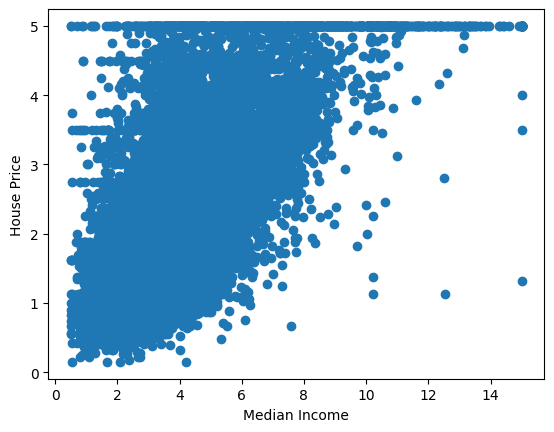

In [19]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.
Какая это зависимость?

Text(0, 0.5, 'House Price')

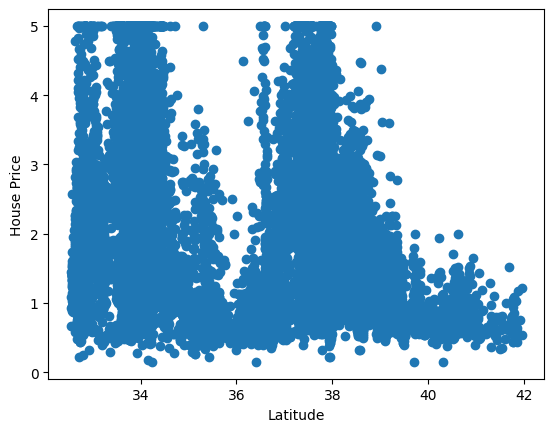

In [20]:
plt.scatter(X['Latitude'], y)
plt.xlabel('Latitude')
plt.ylabel('House Price')

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

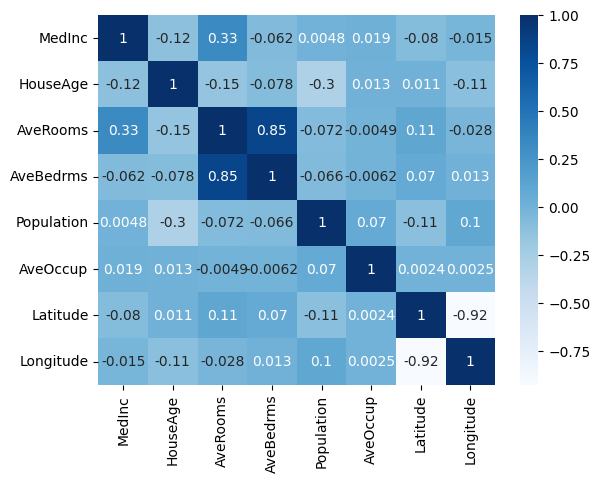

In [21]:
corr = X.corr()
sb.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что две наиболее зависимые пары признаков - это `AveRooms` и `AveBedrms`, а также `Latitude` и `Longitude`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом?
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

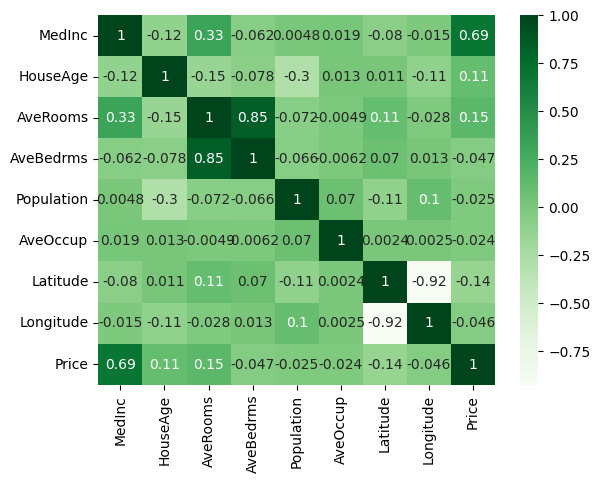

In [22]:
XY = X.assign(Price=y)

corr2 = XY.corr()
sb.heatmap(corr2, cmap="Greens", annot=True);

Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [23]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, shuffle=True)

##Задание 4

Сколько объектов попали в тест?

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [24]:
print(f"Xtrain: {Xtrain.shape}, ytrain: {ytrain.shape}")
print(f"Xtest: {Xtest.shape}, ytest: {ytest.shape}")


Xtrain: (15480, 8), ytrain: (15480,)
Xtest: (5160, 8), ytest: (5160,)


In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain, ytrain)

ytrain_pred = model.predict(Xtrain)

print(f"Train MSE: {mean_squared_error(ytrain, ytrain_pred):.4f}")
print(f"Train MSE: {mean_squared_error(ytrain, ytrain_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(ytrain, ytrain_pred)):.4f}")



Train MSE: 0.5206
Train RMSE: 0.7215


## Задание 5

Вычислите значение метрик *MSE* и *RMSE* на тестовых данных.
Ответ округлите до десятых.

In [26]:

ytest_pred = model.predict(Xtest)


print(f"Test MSE: {mean_squared_error(ytest, ytest_pred):.4f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(ytest, ytest_pred)):.4f}")


Test MSE: 0.5411
Test RMSE: 0.7356


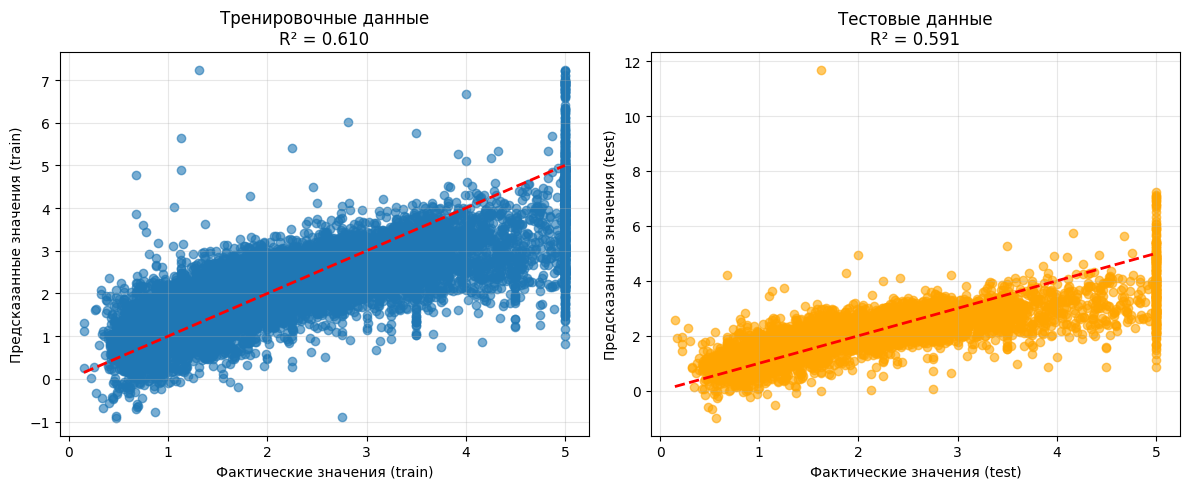

In [27]:
# some pictures from LLM

from sklearn.metrics import r2_score

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(ytrain, ytrain_pred, alpha=0.6)
axes[0].plot([ytrain.min(), ytrain.max()], [ytrain.min(), ytrain.max()], 'r--', lw=2)
axes[0].set_xlabel('Фактические значения (train)')
axes[0].set_ylabel('Предсказанные значения (train)')
axes[0].set_title(f'Тренировочные данные\nR² = {r2_score(ytrain, ytrain_pred):.3f}')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(ytest, ytest_pred, alpha=0.6, color='orange')
axes[1].plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=2)
axes[1].set_xlabel('Фактические значения (test)')
axes[1].set_ylabel('Предсказанные значения (test)')
axes[1].set_title(f'Тестовые данные\nR² = {r2_score(ytest, ytest_pred):.3f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()